In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"C:/Users/Shubhankar/Desktop/ML_Project_11/ML_Project_1_Dataset.csv")
data.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13299 entries, 0 to 13298
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   APP_ID               13299 non-null  int64  
 1    CIBIL_SCORE_VALUE   13299 non-null  int64  
 2   NEW_CUST             13299 non-null  object 
 3   CUS_CATGCODE         13299 non-null  int64  
 4    EMPLOYMENT_TYPE     13299 non-null  int64  
 5   AGE                  13299 non-null  int64  
 6    SEX                 13299 non-null  object 
 7    NO_OF_DEPENDENTS    13299 non-null  int64  
 8    MARITAL             13299 non-null  int64  
 9    EDU_QUA             13299 non-null  int64  
 10    P_RESTYPE          13299 non-null  int64  
 11   P_CATEGORY          13299 non-null  int64  
 12   EMPLOYEE_TYPE       13299 non-null  int64  
 13    MON_IN_OCC         13299 non-null  int64  
 14   INCOM_EXP_GMI       13299 non-null  int64  
 15  LTV                  13299 non-null 

In [5]:
data.APP_ID.nunique()

13299

In [6]:
data.isnull().sum()

APP_ID                 0
 CIBIL_SCORE_VALUE     0
NEW_CUST               0
CUS_CATGCODE           0
 EMPLOYMENT_TYPE       0
AGE                    0
 SEX                   0
 NO_OF_DEPENDENTS      0
 MARITAL               0
 EDU_QUA               0
  P_RESTYPE            0
 P_CATEGORY            0
 EMPLOYEE_TYPE         0
  MON_IN_OCC           0
 INCOM_EXP_GMI         0
LTV                    0
 TENURE                0
STATUS                 0
dtype: int64

<AxesSubplot:>

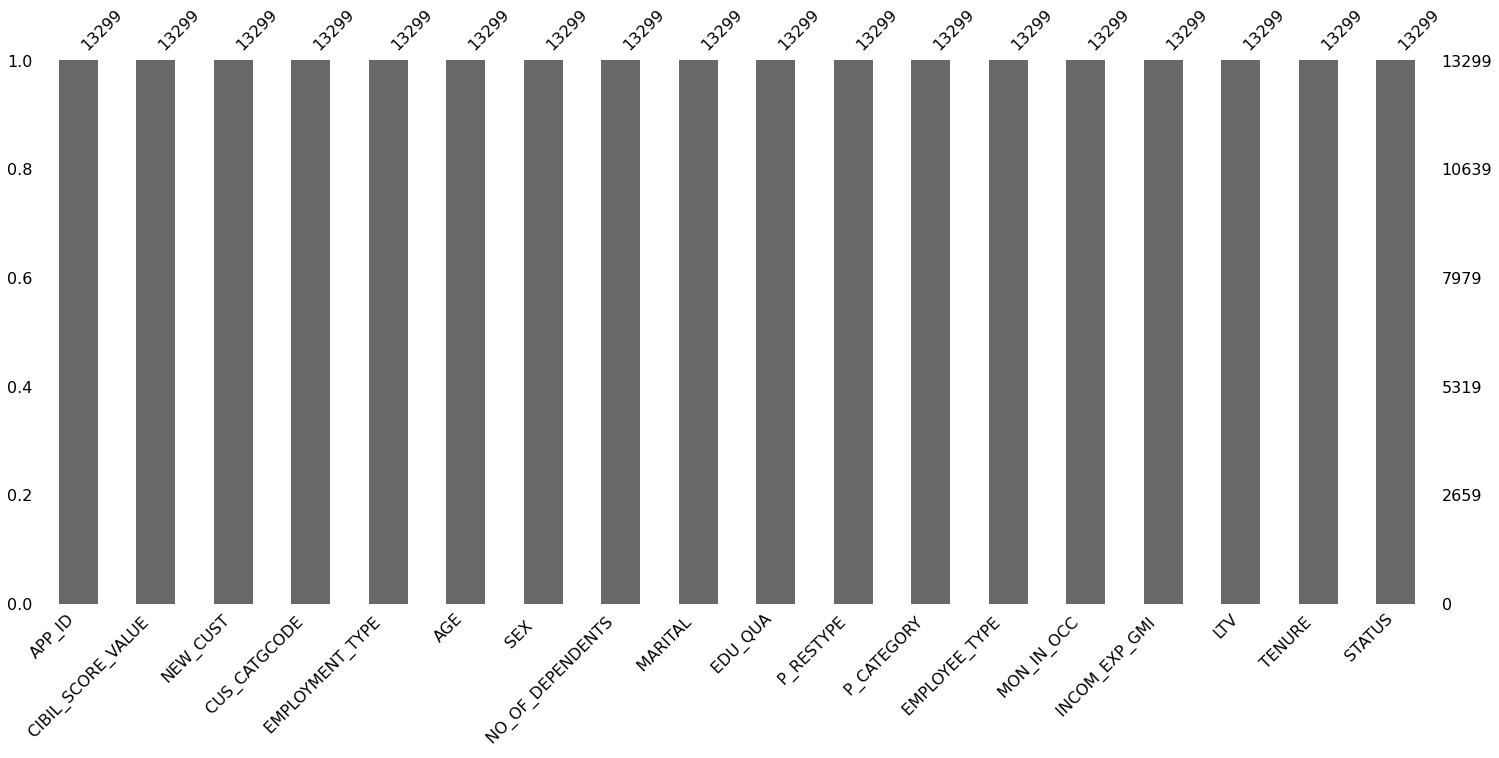

In [7]:
import missingno as msn
msn.bar(data)

<AxesSubplot:>

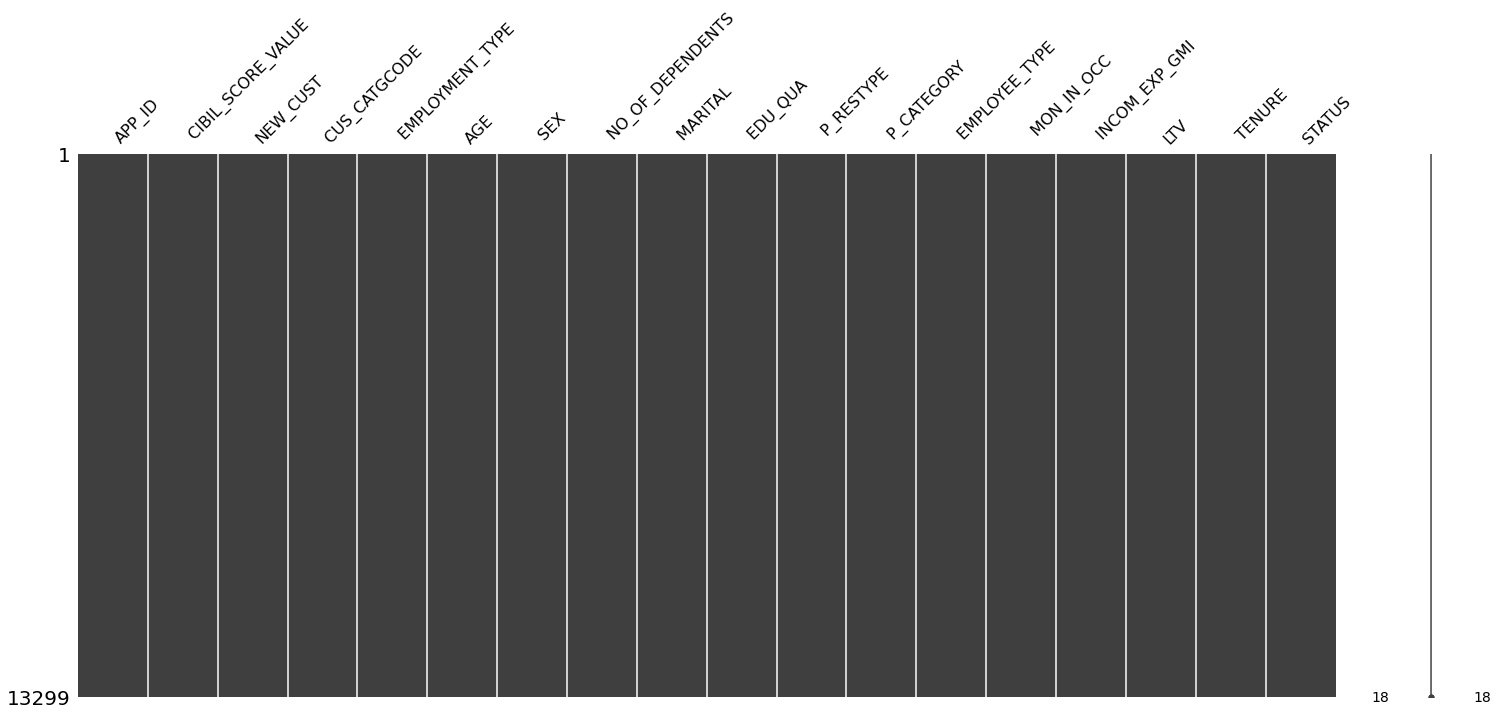

In [8]:
msn.matrix(data)

In [9]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data)

,Total,Percent
APP_ID,0,0.0
CIBIL_SCORE_VALUE,0,0.0
TENURE,0,0.0
LTV,0,0.0
INCOM_EXP_GMI,0,0.0
MON_IN_OCC,0,0.0
EMPLOYEE_TYPE,0,0.0
P_CATEGORY,0,0.0
P_RESTYPE,0,0.0
EDU_QUA,0,0.0


In [11]:
data.describe()

,APP_ID,CIBIL_SCORE_VALUE,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
count,13299.0000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000,13299.000000
mean,25643.0000,1.037898,0.908640,0.658922,32.473870,1.536281,0.590044,0.485149,0.427175,2.340778,0.833371,74.508760,0.751259,0.776054,24.792240,0.377171
std,7678.4699,0.865391,0.288132,0.474089,8.804317,0.971671,0.491844,0.499798,0.727715,1.341674,0.553415,72.971951,0.938441,0.126130,7.501085,0.484697
min,12345.0000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.007508,12.000000,0.000000
25%,18994.0000,0.000000,1.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,24.000000,0.000000,0.719710,18.000000,0.000000
50%,25643.0000,1.000000,1.000000,1.000000,31.000000,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000,48.000000,0.000000,0.807537,24.000000,0.000000
75%,32292.0000,2.000000,1.000000,1.000000,38.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,100.000000,1.000000,0.849177,36.000000,1.000000
max,38941.0000,2.000000,1.000000,1.000000,55.000000,3.000000,1.000000,1.000000,2.000000,4.000000,2.000000,398.000000,3.000000,1.000000,36.000000,1.000000
